<a href="https://colab.research.google.com/github/JoeyThirawat/RAI2.2-RoboticsLab3/blob/main/try_Yolo_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 12310, done.
remote: Total 12310 (delta 0), reused 0 (delta 0), pack-reused 12310
Receiving objects: 100% (12310/12310), 11.51 MiB | 23.21 MiB/s, done.
Resolving deltas: 100% (8560/8560), done.
/content/yolov5
     |████████████████████████████████| 596 kB 5.4 MB/s 


In [3]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


### Training the model
We can train the model with train.py command. Few options for training commands are:


*   img - define the size of input image
*   batch - define the batch size
* epochs - define the number of training epochs
* data - path to yaml file
* cfg - specify the model configuration
* weights - specify the path for the weights for transfer learning. Weights can be downloaded from [here](https://drive.google.com/drive/folders/1Drs_Aiu7xx6S-ix95f9kNsA6ueKRpN2J).

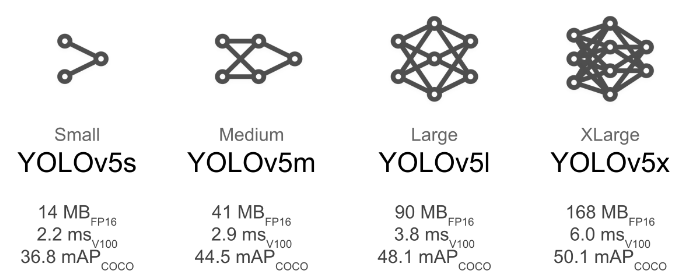

Comparison of the models can be seen [here](https://github.com/ultralytics/yolov5#pretrained-checkpoints).

In [9]:
!python train.py --img 416 --data '/content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/data.yaml' --cfg ./models/yolov5s.yaml --weights '' 


train: weights=, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-74-gcf4f3c3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

In [10]:
!cp runs/train/exp4/weights/best.pt /content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/best.pt


In [14]:
!python detect.py --weights /content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/best.pt --conf 0.4 --source /content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/screwdriver.mp4
#/content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/data.yaml

detect: weights=['/content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/best.pt'], source=/content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/screwdriver.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-74-gcf4f3c3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/681) /content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/screwdriver.mp4: 640x384 2 Screwdriverrotations, Done. (0.028s)
video 1/1 (2/681) /content/drive/MyDrive/RAI/RoboticsLabRAI2.2/yolov5/screwdriver.mp4: 640x384 2 Screwdriverrotations, Done. (0.028s)
video 1/1 (3/681) /content/d

In [12]:
!ls runs/detect/exp
!pwd

IMG_20210128_112321_resized_jpg.rf.5b24b34c123bd7bbc6df519dc55a0d7b.jpg
IMG_20210128_112321_resized_jpg.rf.822f3d0468975925b151968e0eb8ce0e.jpg
IMG_20210129_130143_resized_jpg.rf.53d0ec924cf9bbb4745dab215bb1c733.jpg
IMG_20210129_130238_resized_jpg.rf.ed24e8b7927f8db702cc637d2defa937.jpg
/content/yolov5


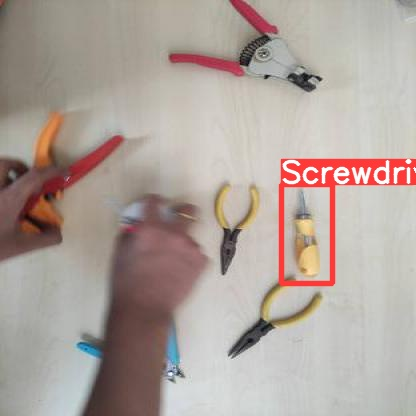

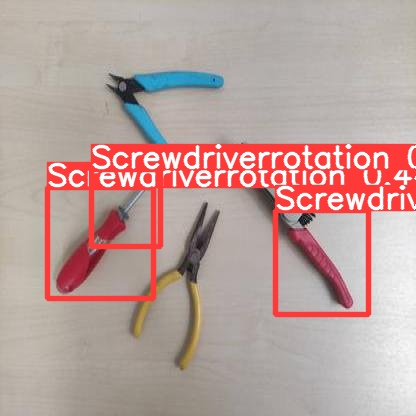

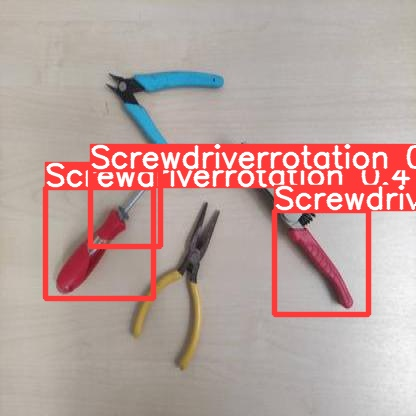

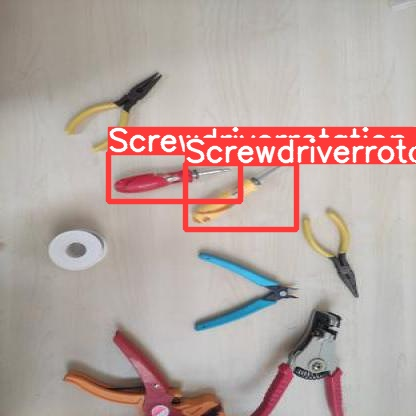

In [13]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('./runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")